<b style="color:Green;font-size:32px;">Technocolabs Machine Learning Internship!</b><br>
<b style="color:#ff3333;font-size:19px;">Project 3 - Performing Logistic Regression with a New Feature and Creating a Precision-Recall Curve</b><br>
<b style="font-size:17px;">Description of the task:-</b><br>
<ul style="font-size:15px;line-height:10px;"><li><b>In this Project, you'll train a logistic regression using a feature besides EDUCATION.</b></li><br>
    <li><b>Then you will graphically assess the tradeoff between precision and recall.</b></li><br>
<li><b>calculate the area underneath a precision-recall curve. </b></li><br>
<li><b>You will also calculate the ROC AUC on both the training and testing sets and compare them.</b></li><br>
    <b><li>Platform Used-Jupyter Notebook(Python)</li></b><br><b><li>GitHub Repository Link:- <a>https://github.com/UMMEATHIYA/Technocolabs-ML-Internship</a></li></b>
</ul>

In [1]:
import numpy as np #numerical computation
import pandas as pd #data wrangling
import matplotlib.pyplot as plt #plotting package
%matplotlib inline
import matplotlib as mpl #add'l plotting functionality
mpl.rcParams['figure.dpi'] = 400 #high res figures

In [2]:
df = pd.read_csv('cleaned_data.csv')

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,EDUCATION_CAT,graduate school,high school,others,university
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,1,university,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,1000,1000,0,2000,1,university,0,0,0,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,1000,1000,1000,5000,0,university,0,0,0,1
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,1200,1100,1069,1000,0,university,0,0,0,1
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,10000,9000,689,679,0,university,0,0,0,1


In [4]:
df['default payment next month'].mean()

0.2217971797179718

In [5]:
df.groupby('default payment next month')['ID'].count()

default payment next month
0    20750
1     5914
Name: ID, dtype: int64

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
my_lr = LogisticRegression()
my_lr

LogisticRegression()

In [17]:
model = LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True, 
                                intercept_scaling=1, max_iter=100, n_jobs=None, 
                                penalty='l2', random_state=None, solver='liblinear', tol=0.0001, 
                                verbose=0, warm_start=False)

In [18]:
my_new_lr.C = 0.1
my_new_lr.solver = 'liblinear'
my_new_lr

LogisticRegression(C=0.1, multi_class='warn', solver='liblinear')

In [24]:
train_x, test_x, train_y, test_y = train_test_split(
df['EDUCATION'].values.reshape(-1,1), df['default payment next month'].values,
test_size=0.3, random_state=42)

In [25]:
print (train_x.shape)
print (train_y.shape)
print (test_x.shape)
print (test_y.shape)

(18664, 1)
(18664,)
(8000, 1)
(8000,)


In [26]:
model.fit(train_x,train_y)
pred_y = model.predict(test_x)
pred_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [27]:
model.intercept_

array([-1.4497892])

In [28]:
print("Training Score :",model.score(train_x,train_y))
print("Testing Score :",model.score(test_x,test_y))

from sklearn.metrics import accuracy_score
print("Training Accuracy",accuracy_score(train_x,train_y))
print("Testing Accuracy",accuracy_score(test_x,test_y))

Training Score : 0.7777539648521218
Testing Score : 0.77925
Training Accuracy 0.06825975139305615
Testing Accuracy 0.068875


In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred_y)

array([[6234,    0],
       [1766,    0]], dtype=int64)

In [30]:
y_pred_proba = model.predict_proba(test_x)
y_pred_proba

array([[0.79270323, 0.20729677],
       [0.79270323, 0.20729677],
       [0.79270323, 0.20729677],
       ...,
       [0.77430927, 0.22569073],
       [0.79270323, 0.20729677],
       [0.77430927, 0.22569073]])

In [31]:
pos_proba = y_pred_proba[:,1]
pos_proba

array([0.20729677, 0.20729677, 0.20729677, ..., 0.22569073, 0.20729677,
       0.22569073])

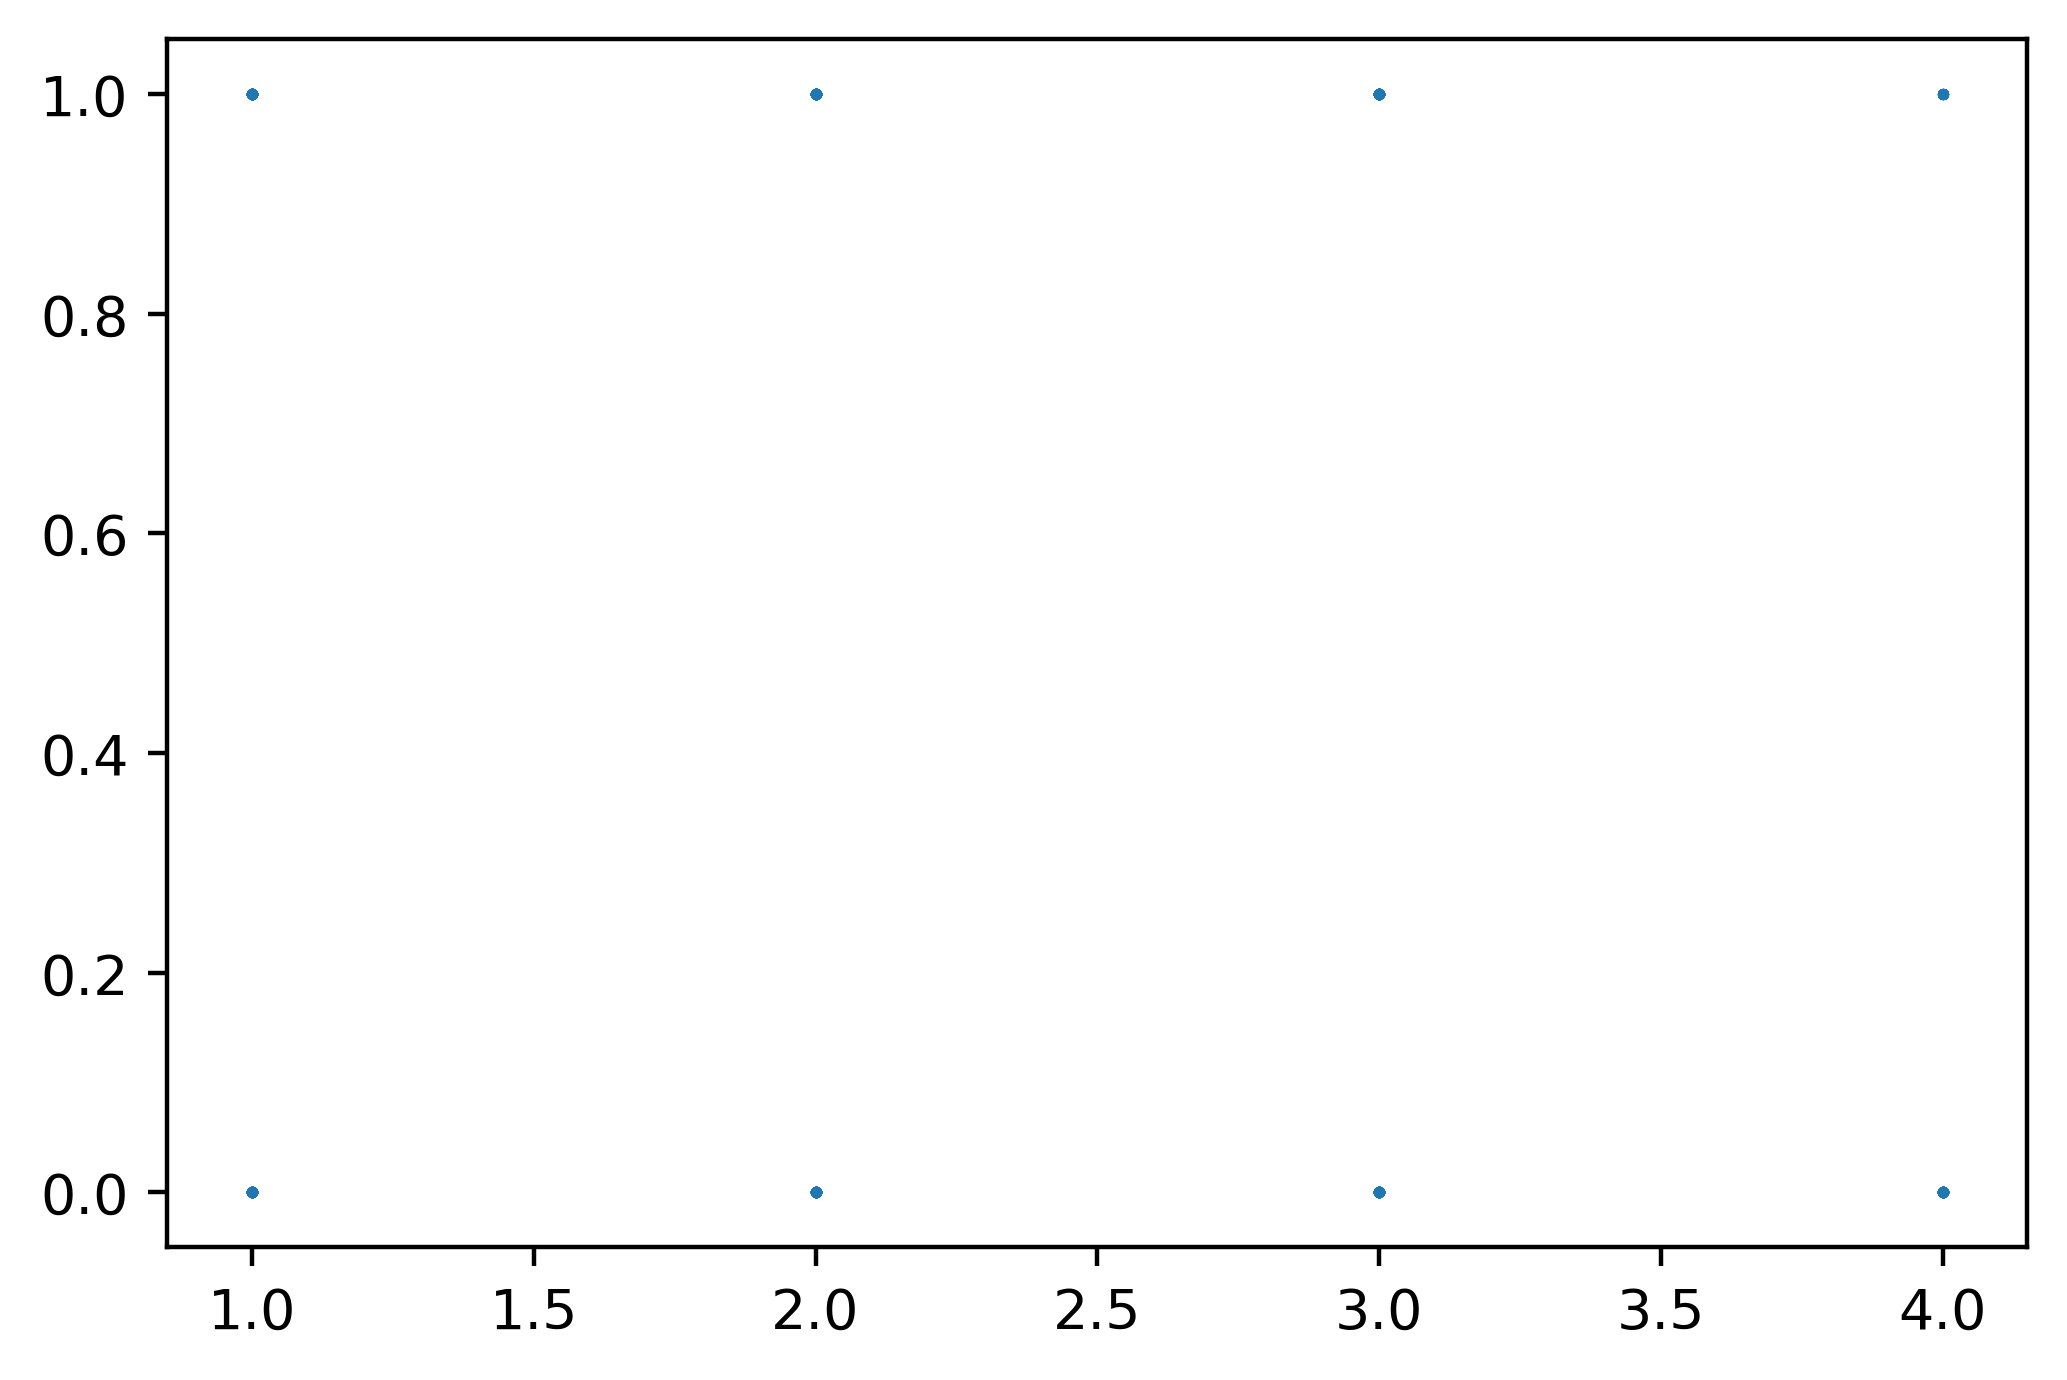

In [34]:
plt.scatter(train_x,train_y,s=1)

In [35]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
fpr, tpr, t = roc_curve(test_y, pos_proba)

print ("Flase Positive Rate : ", fpr)
print ("True Positive Rate : ",tpr)
print ("Threshold : ",t)

Flase Positive Rate :  [0.         0.0165223  0.17789541 0.6385948  1.        ]
True Positive Rate :  [0.         0.00453001 0.18629672 0.68799547 1.        ]
Threshold :  [1.26584197 0.26584197 0.24521196 0.22569073 0.20729677]


Text(0.5, 1.0, 'ROC curve')

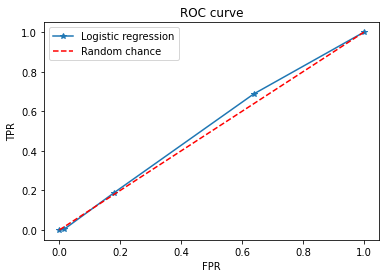

In [36]:
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

In [40]:
from sklearn.metrics import roc_auc_score
print("Area under ROC-AUC cureve : ",roc_auc_score(test_y, pos_proba))

Area under ROC-AUC cureve :  0.521852681255861


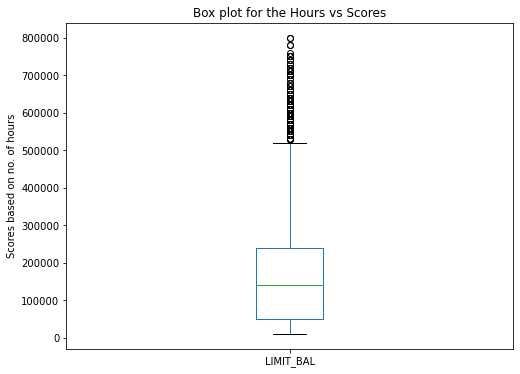

In [48]:
df_scores = df['LIMIT_BAL']
df_scores.plot(kind='box', figsize=(8, 6))
plt.title('Box plot for the Hours vs Scores')
plt.ylabel('Scores based on no. of hours')
plt.show()

C:\Users\Admin\anaconda3\envs\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


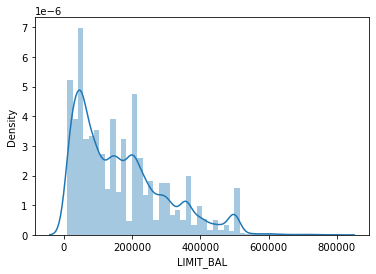

In [50]:
import seaborn as sns
sns.distplot(df['LIMIT_BAL'])